# Monte Carlo Path Generator

In [1]:
from pyFTracks.path_generators import MonteCarloPathGenerator
import numpy as np

In [2]:
inversion = MonteCarloPathGenerator((0, 120), (0, 150))

It looks like you have entered temperature in Celsius...Converting temperature to Kelvin


In [3]:
constrain2 = {'time': (60., 150),
              'temperature': (60., 100.)}

constrain3 = {'time': (50., 60.),
              'temperature': (0., 10.)}

constrain4 = {'time': (30., 40.),
              'temperature': (20., 40.)}

constrain5 = {'time': (0., 20.),
              'temperature': (0., 10.)}

In [4]:
constrains = [constrain2, constrain3, constrain4, constrain5]

In [5]:
inversion.add_constraint(constrains)

[{'time': array([0., 0.]), 'temperature': array([273.15, 293.15])},
 {'time': array([ 60., 150.]), 'temperature': array([333.15, 373.15])},
 {'time': array([50., 60.]), 'temperature': array([273.15, 283.15])},
 {'time': array([30., 40.]), 'temperature': array([293.15, 313.15])},
 {'time': array([ 0., 20.]), 'temperature': array([273.15, 283.15])}]

In [6]:
inversion.constraints

[{'time': array([0., 0.]), 'temperature': array([273.15, 293.15])},
 {'time': array([ 60., 150.]), 'temperature': array([333.15, 373.15])},
 {'time': array([50., 60.]), 'temperature': array([273.15, 283.15])},
 {'time': array([30., 40.]), 'temperature': array([293.15, 313.15])},
 {'time': array([ 0., 20.]), 'temperature': array([273.15, 283.15])}]

# Plot Generated Paths

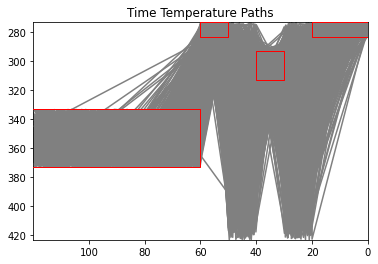

In [7]:
inversion.generate_paths()
ax = inversion.plot_paths()

In [8]:
inversion.constraints

[{'time': array([0., 0.]), 'temperature': array([273.15, 293.15])},
 {'time': array([ 60., 150.]), 'temperature': array([333.15, 373.15])},
 {'time': array([50., 60.]), 'temperature': array([273.15, 283.15])},
 {'time': array([30., 40.]), 'temperature': array([293.15, 313.15])},
 {'time': array([ 0., 20.]), 'temperature': array([273.15, 283.15])}]

# Draw a path

In [9]:
time = np.array([70, 55, 35, 10, 0.])
temperature = np.array([80, 10, 30, 5, 5.])

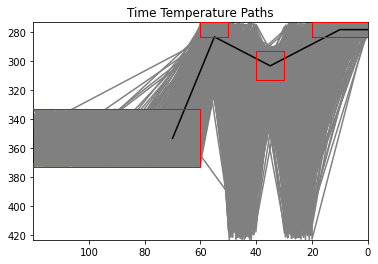

In [10]:
from pyFTracks.thermal_history import ThermalHistory, WOLF1

true_path = ThermalHistory(time, temperature + 273.15)
ax = inversion.plot_paths()
ax.plot(true_path.input_time, true_path.input_temperature, color="k")

## Generate synthetic track lengths

In [11]:
from pyFTracks.annealing import Ketcham1999
from pyFTracks.thermal_history import ThermalHistory

In [12]:
model = Ketcham1999()
model.kinetic_parameter_type = "ETCH_PIT_LENGTH"
model.kinetic_parameter = 1.65
model.history = true_path

In [13]:
model.calculate_age()

(70.0, 70.3774396634549, 1.0081378145290023)

In [14]:
true_age, error_age = model.ft_model_age, model.ft_model_age * 0.10

In [15]:
synthetic_lengths = model.generate_synthetic_lengths(30)

# Inversion

In [16]:
inversion.annealing_model = model

In [17]:
inversion.run(synthetic_lengths, true_age, error_age)

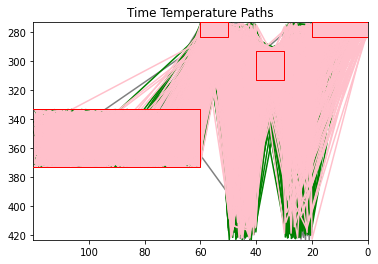

In [19]:
ax = inversion.plot_paths()

In [22]:
time = inversion.TTPaths[:,0]

In [23]:
temperature = inversion.TTPaths[:, 1]

In [24]:
temperature

array([[  2.57004406, 273.81046183],
       [  4.13035114, 278.66807181],
       [  1.64174566, 276.6369211 ],
       ...,
       [  3.67856857, 279.30002528],
       [  8.03587652, 276.79546442],
       [  0.97575408, 274.43023525]])

In [31]:
inversion.TTPaths[0][:, 0]

array([  0.        ,   2.57004406,   6.76886958,  12.05077052,
        17.44860226,  21.80072534,  29.12358783,  30.47286135,
        53.10536267,  55.84730145,  59.03295091,  64.14763054,
        69.29272043,  74.61811041,  75.45613988,  83.82003101,
        91.93723849,  94.46460151,  95.38723492, 107.55430174])

In [32]:
inversion.TTPaths[0][:, 1]

array([273.62491616, 273.81046183, 273.71180504, 277.79851349,
       282.89097498, 414.61732493, 386.19908297, 299.58506282,
       276.45411526, 279.56553809, 278.47527313, 368.3238048 ,
       360.60001454, 337.33899764, 360.83982724, 361.99016568,
       359.20353456, 357.89804327, 335.83032564, 366.06172828])

In [37]:
npoints = 3 * (1 + (2**4 - 1))

time = np.random.rand(100, npoints)
time = (1.0 - time)
# Final time is always present time
time[:, -1] = 0
time = np.sort(time, axis=1) 

In [40]:
temperature = np.random.rand(100, npoints)

In [41]:
dts = np.diff(time)

In [ ]:
dTs = dts * 